# EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('data/01_cleansed.csv')
print(df.shape)
df.info()

(316821, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316821 entries, 0 to 316820
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    316821 non-null  int64  
 1   loan_amnt             316821 non-null  int64  
 2   term                  316821 non-null  object 
 3   int_rate              316821 non-null  float64
 4   installment           316821 non-null  float64
 5   grade                 316821 non-null  object 
 6   sub_grade             316821 non-null  object 
 7   emp_title             298748 non-null  object 
 8   emp_length            302489 non-null  object 
 9   home_ownership        316821 non-null  object 
 10  annual_inc            316821 non-null  float64
 11  verification_status   316821 non-null  object 
 12  loan_status           316821 non-null  object 
 13  purpose               316821 non-null  object 
 14  title                 315429 non-null  

## Missing values

In [8]:
df.isnull().mean().sort_values(ascending=False)*100

mort_acc                9.716212
emp_title               5.704483
emp_length              4.523690
title                   0.439365
pub_rec_bankruptcies    0.136670
revol_util              0.069755
id                      0.000000
dti                     0.000000
application_type        0.000000
initial_list_status     0.000000
total_acc               0.000000
revol_bal               0.000000
pub_rec                 0.000000
open_acc                0.000000
earliest_cr_line        0.000000
purpose                 0.000000
loan_amnt               0.000000
loan_status             0.000000
verification_status     0.000000
annual_inc              0.000000
home_ownership          0.000000
sub_grade               0.000000
grade                   0.000000
installment             0.000000
int_rate                0.000000
term                    0.000000
address                 0.000000
dtype: float64

## Helper functions

In [6]:
# Helper to see cross tab with categorical/discrete variable against the target
def crosstab_target(df, col):
    target_col = 'loan_status'
    data = pd.crosstab(df[col],df[target_col], margins=True)
    data['% Charged Off'] = data['Charged Off'] / data['All'] * 100
    data['% Fully Paid'] = data['Fully Paid'] / data['All'] * 100
    return data

In [187]:
# Numerical feature EDA Helper

target_col = 'loan_status'
percentiles = [.05,.25,.75,.95, .99]

def dist_num_feature(df, col, hist_rtrim=0.0, bins=25, log=False):
    data = df.loc[:, [col, target_col]]
    
    display(pd.concat([data[col].describe(percentiles=percentiles).to_frame().T, 
          data.groupby(target_col)[col].describe(percentiles=percentiles)]))

    mask = data[col] <= data[col].quantile(1-hist_rtrim)

    fig, ax = plt.subplots(1,2, figsize=(12,3), tight_layout=True)
    
    if log:
        data['log_'+col] = np.log(data[col] + .001)
        sns.histplot(data=data, x='log_'+col, bins=bins, ax=ax[0]); ax[0].set_xlabel(f"log({col})")
        sns.boxenplot(data=data, x=col, y=target_col, orient='h', ax=ax[1])
        ax[1].set_xscale('log'); ax[1].set_xlabel(f"log({col})")
    else:
        sns.histplot(data=data[mask], x=col, bins=bins, ax=ax[0])
        sns.boxenplot(data=data, x=col, y=target_col, orient='h', ax=ax[1])

        
def dist_cat_feature(df, col, figsize):
    data = pd.crosstab(df[col], df[target_col], margins=True)
    data['% Charged Off'] = (data['Charged Off'] / data['All'] * 100).round(2)
    data['% Fully Paid'] = (data['Fully Paid'] / data['All'] * 100).round(2)
    display(data)

    fig, ax = plt.subplots(1,2,figsize=figsize, tight_layout=True)
    data[['Charged Off','Fully Paid']].plot.barh(stacked=True, ax=ax[0], legend=False)
    
    data[['% Charged Off','% Fully Paid']].plot.barh(stacked=True, ax=ax[1])
    ax[1].vlines(x=data.loc['All','% Charged Off'], ymin=-.5, ymax=len(data.index), linestyle='--', color='fuchsia')
    ax[1].set_ylabel('')
    plt.suptitle(col)
    plt.legend(loc='center left', bbox_to_anchor=(1, .5))

# Numerical Features

This part will go through each of numerical features and check distribution between Charged Off and Fully Paid groups.

## loan_amnt

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
loan_amnt,316821.0,14070.782555,8342.495955,500.0,3200.0,7925.0,12000.0,20000.0,30750.0,35000.0,40000.0
Charged Off,49949.0,15150.079081,8502.945153,1000.0,3900.0,8725.0,14000.0,20000.0,33065.0,35000.0,40000.0
Fully Paid,266872.0,13868.776417,8296.553515,500.0,3100.0,7500.0,12000.0,19200.0,30000.0,35000.0,40000.0


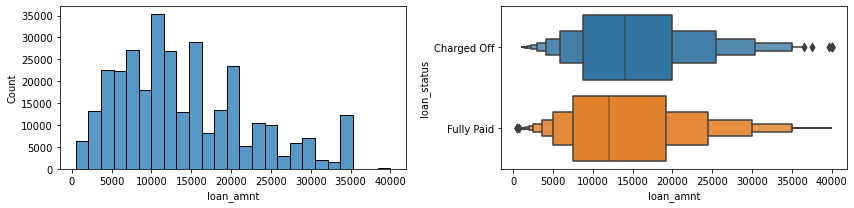

In [74]:
dist_num_feature(df, 'loan_amnt')

## int_rate

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
int_rate,316821.0,13.530403,4.445560,5.32,6.68,10.16,13.11,16.29,21.60,24.99,30.99
Charged Off,49949.0,15.888448,4.382699,5.32,8.88,12.99,15.61,18.75,23.99,25.89,30.99
Fully Paid,266872.0,13.089061,4.316417,5.32,6.62,9.91,12.99,15.61,20.99,24.50,30.99


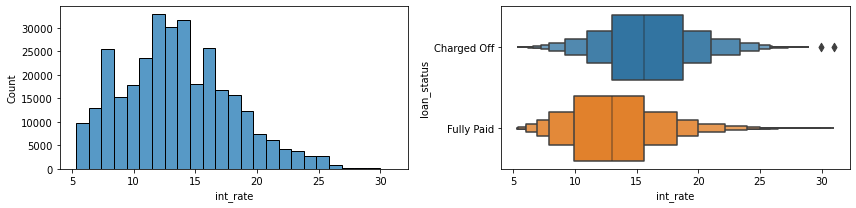

In [75]:
dist_num_feature(df, 'int_rate')

## installment

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
installment,316821.0,431.057841,250.691557,16.08,108.98,249.55,374.92,566.44,924.74,1201.86,1533.81
Charged Off,49949.0,453.297029,248.972721,21.62,128.53,275.72,399.97,585.47,946.68,1220.33,1440.24
Fully Paid,266872.0,426.895451,250.793421,16.08,106.63,244.79,369.93,562.71,918.16,1201.33,1533.81


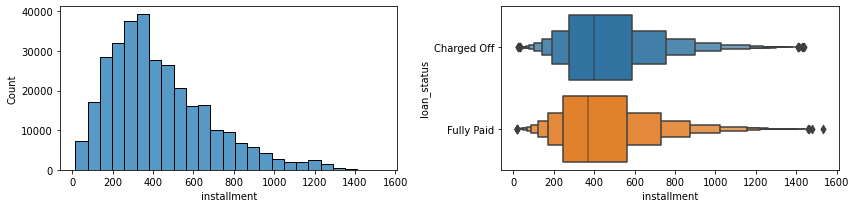

In [76]:
dist_num_feature(df, 'installment')

In [77]:
df[['loan_amnt','int_rate','installment']].corr()

,loan_amnt,int_rate,installment
loan_amnt,1.000000,0.164745,0.954423
int_rate,0.164745,1.000000,0.159186
installment,0.954423,0.159186,1.000000


We may choose to drop installment later, since it highly correlates with loan_amnt.

## annual_inc

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
annual_inc,316821.0,74531.937960,62890.049203,600.0,28000.000,45000.0,64500.0,90000.0,150000.0,250000.0,8706582.0
Charged Off,49949.0,67766.419852,65193.540553,4524.0,25793.016,42000.0,59000.0,80000.0,137000.0,220000.0,8706582.0
Fully Paid,266872.0,75798.203676,62368.122053,600.0,29000.000,46280.0,65000.0,90000.0,150000.0,250000.0,7600000.0


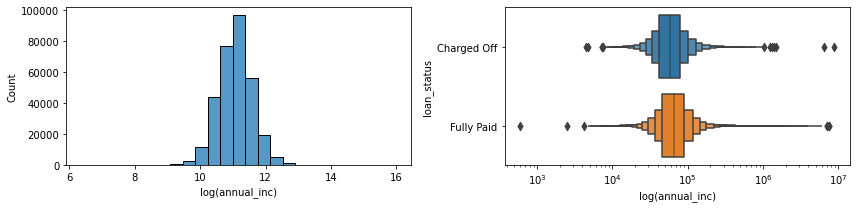

In [87]:
dist_num_feature(df, 'annual_inc', log=True)

### installment_inc_ratio

Installment / Monthly Income ratio

$$ratio = \frac{Monthly Installment}{Monthly Income}$$
Probably similar to DTI but looks like DTI doesn't include the requested loan.  
This measures the new debt obligation in proportion to the borrow's monthly income.

(Feature experiment)


In [82]:
# also have to handle income = 0 -> division by zero -> inf -> 0.0
df['installment_inc_ratio'] = df.installment / df.annual_inc * 12

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
installment_inc_ratio,316821.0,0.078759,0.049400,0.000123,0.021092,0.047187,0.073060,0.105308,0.153791,0.185339,15.299800
Charged Off,49949.0,0.089979,0.041810,0.000375,0.026902,0.057976,0.086710,0.119720,0.162965,0.190830,0.450564
Fully Paid,266872.0,0.076658,0.050418,0.000123,0.020321,0.045629,0.070707,0.102120,0.151501,0.184291,15.299800


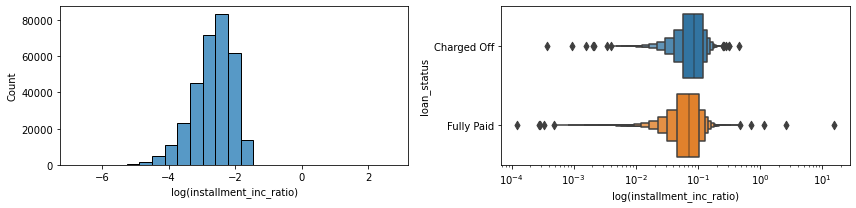

In [88]:
dist_num_feature(df, 'installment_inc_ratio', log=True)

## DTI

Since there are outliers, I'll try creating 2 features

In [296]:
df.dti.describe(percentiles=[.25,.75,.9,.99])

count    316821.000000
mean         17.246776
std           8.627046
min           0.000000
25%          11.200000
50%          16.790000
75%          22.850000
90%          28.360000
99%          36.280000
max        1622.000000
Name: dti, dtype: float64

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
dti,316821.0,17.246776,8.627046,0.0,4.630,11.20,16.79,22.85,31.45,36.2800,1622.00
Charged Off,49949.0,19.506345,8.434871,0.0,5.864,13.28,19.30,25.56,33.69,38.1252,88.21
Fully Paid,266872.0,16.823864,8.596827,0.0,4.460,10.88,16.34,22.28,30.81,35.4000,1622.00


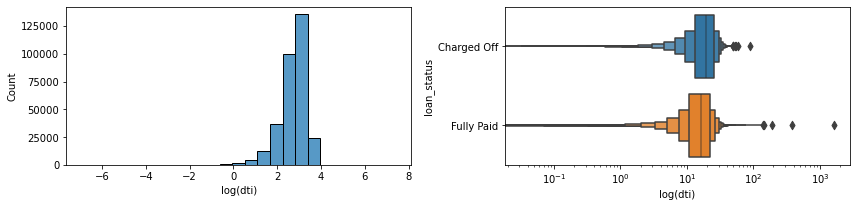

In [89]:
dist_num_feature(df, 'dti', log=True)

## open_acc

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
open_acc,316821.0,11.290287,5.127880,0.0,5.0,8.0,10.0,14.0,21.0,27.0,90.0
Charged Off,49949.0,11.589001,5.300658,0.0,5.0,8.0,11.0,14.0,21.0,28.0,76.0
Fully Paid,266872.0,11.234378,5.092956,0.0,5.0,8.0,10.0,14.0,21.0,27.0,90.0


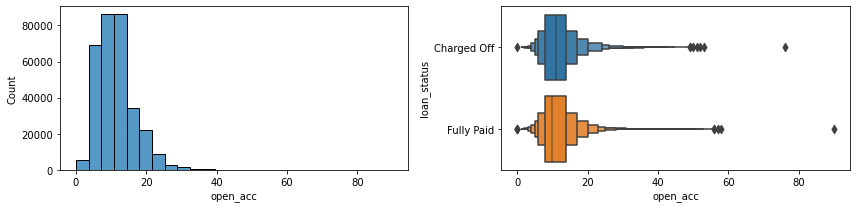

In [90]:
dist_num_feature(df, 'open_acc')

## pub_rec

In [91]:
df.pub_rec.value_counts(dropna=False, normalize=True)*100

0     85.491492
1     12.502328
2      1.372699
3      0.385075
4      0.127201
5      0.058077
6      0.031248
7      0.013257
8      0.008207
9      0.002525
11     0.002525
10     0.002209
13     0.001263
86     0.000316
24     0.000316
40     0.000316
19     0.000316
17     0.000316
12     0.000316
Name: pub_rec, dtype: float64

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
pub_rec,316821.0,0.176996,0.532252,0.0,0.0,0.0,0.0,0.0,1.0,2.0,86.0
Charged Off,49949.0,0.200384,0.691465,0.0,0.0,0.0,0.0,0.0,1.0,2.0,86.0
Fully Paid,266872.0,0.172618,0.496696,0.0,0.0,0.0,0.0,0.0,1.0,2.0,24.0


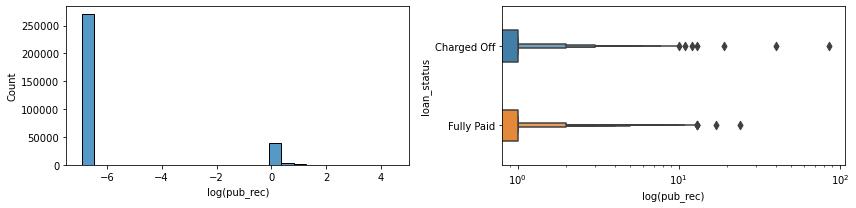

In [97]:
dist_num_feature(df, 'pub_rec', log=True)

## revol_bal

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
revol_bal,316821.0,15858.912945,20628.878285,0.0,1675.0,6022.0,11184.0,19648.0,41080.0,86190.80,1743266.0
Charged Off,49949.0,15392.276082,18496.526896,0.0,1830.4,6151.0,11303.0,19493.0,39658.0,72675.76,1030826.0
Fully Paid,266872.0,15946.250862,21002.822567,0.0,1645.0,5997.0,11163.0,19682.0,41409.0,88532.03,1743266.0


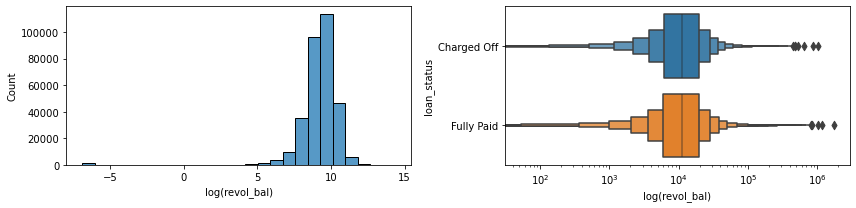

In [99]:
dist_num_feature(df, 'revol_bal', log=True)

## revol_util

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
revol_util,316600.0,53.606233,24.477192,0.0,11.0,35.6,54.6,72.7,91.9,98.0,892.3
Charged Off,49914.0,57.906586,23.536340,0.0,16.2,41.2,59.4,76.3,93.6,98.8,148.0
Fully Paid,266686.0,52.801363,24.565848,0.0,10.3,34.6,53.7,71.9,91.5,97.8,892.3


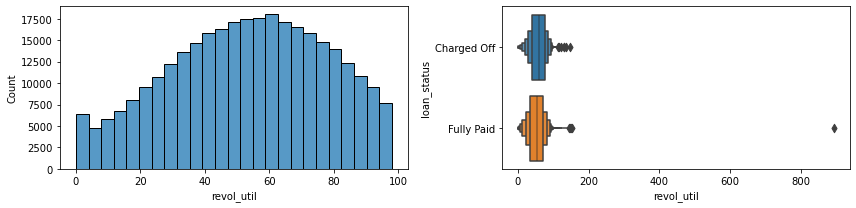

In [103]:
dist_num_feature(df, 'revol_util', hist_rtrim=.01)

In [104]:
df.revol_util.isna().sum(), df.revol_util.isna().mean()*100

(221, 0.06975547706749237)

## total_acc

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
total_acc,316821.0,25.421181,11.873874,2.0,9.0,17.0,24.0,32.0,47.0,60.0,150.0
Charged Off,49949.0,24.953052,11.915921,2.0,9.0,16.0,23.0,32.0,47.0,60.0,110.0
Fully Paid,266872.0,25.508798,11.863959,2.0,9.0,17.0,24.0,32.0,47.0,60.0,150.0


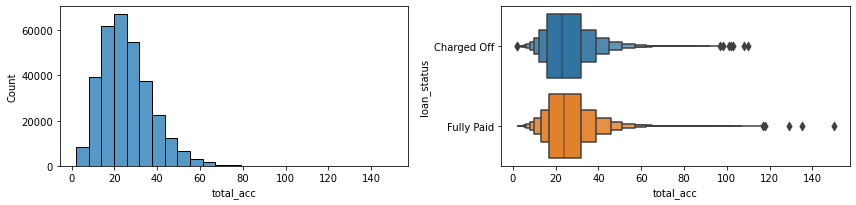

In [105]:
dist_num_feature(df, 'total_acc')

## mort_acc

In [312]:
df.mort_acc.isna().value_counts(normalize=True)*100

False    90.283788
True      9.716212
Name: mort_acc, dtype: float64

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
mort_acc,286038.0,1.830474,2.158590,0.0,0.0,0.0,1.0,3.0,6.0,9.0,34.0
Charged Off,46346.0,1.501187,1.975382,0.0,0.0,0.0,1.0,2.0,5.0,8.0,23.0
Fully Paid,239692.0,1.894143,2.186539,0.0,0.0,0.0,1.0,3.0,6.0,9.0,34.0


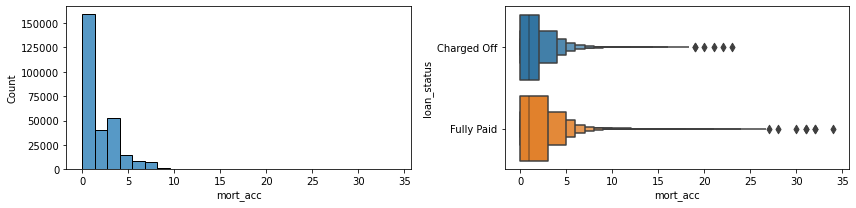

In [106]:
dist_num_feature(df, 'mort_acc')

### mort_acc_adj & mort_acc_missing
Impute 0 + new flag to indicate missing mort_acc

In [176]:
df['mort_acc_missing'] = df.mort_acc.isna()

loan_status,Charged Off,Fully Paid,All,% Charged Off,% Fully Paid
mort_acc_missing,,,,,
False,46346,239692,286038,16.20,83.80
True,3603,27180,30783,11.70,88.30
All,49949,266872,316821,15.77,84.23


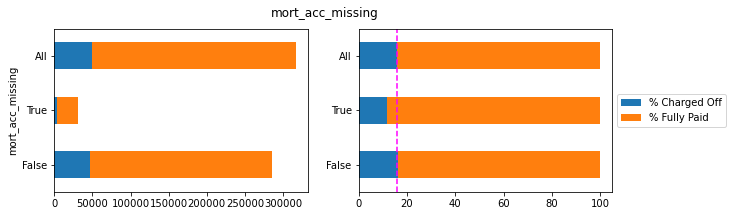

In [178]:
dist_cat_feature(df, 'mort_acc_missing', figsize=(10,3))

## pub_rec_bankruptcies

In [179]:
df.pub_rec_bankruptcies.isna().sum()

433

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
pub_rec_bankruptcies,316388.0,0.121152,0.355296,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
Charged Off,49893.0,0.128094,0.369895,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
Fully Paid,266495.0,0.119852,0.352481,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0


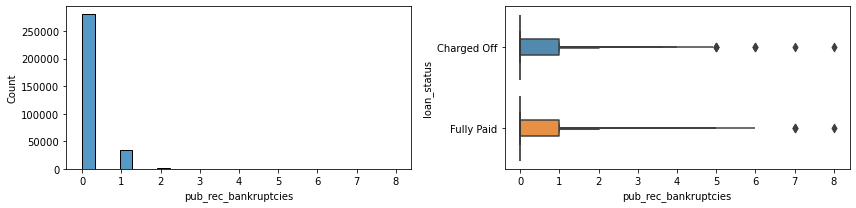

In [180]:
dist_num_feature(df, 'pub_rec_bankruptcies')

# Categorical Features

## term

loan_status,Charged Off,Fully Paid,All,% Charged Off,% Fully Paid
term,,,,,
36 months,30576,213326,243902,12.54,87.46
60 months,19373,53546,72919,26.57,73.43
All,49949,266872,316821,15.77,84.23


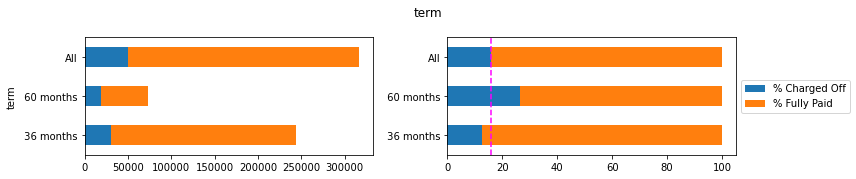

In [188]:
dist_cat_feature(df, 'term', figsize=(12,2.5))

## grade

loan_status,Charged Off,Fully Paid,All,% Charged Off,% Fully Paid
grade,,,,,
A,2560,50435,52995,4.83,95.17
B,9374,85258,94632,9.91,90.09
C,14434,69846,84280,17.13,82.87
D,11794,37795,49589,23.78,76.22
E,7624,16580,24204,31.50,68.50
F,3220,5640,8860,36.34,63.66
G,943,1318,2261,41.71,58.29
All,49949,266872,316821,15.77,84.23


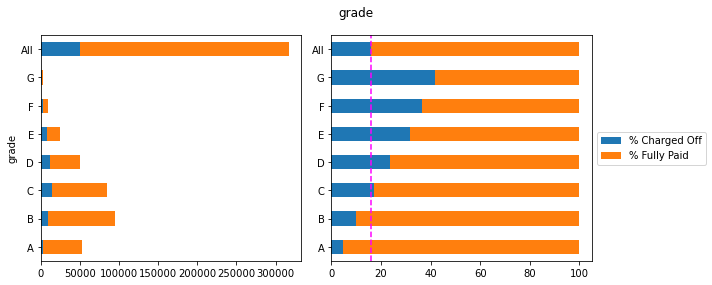

In [189]:
dist_cat_feature(df, 'grade', figsize=(10,4))

## sub_grade

loan_status,Charged Off,Fully Paid,All,% Charged Off,% Fully Paid
sub_grade,,,,,
A1,177,7933,8110,2.18,97.82
A2,289,7535,7824,3.69,96.31
A3,405,8361,8766,4.62,95.38
A4,713,12370,13083,5.45,94.55
A5,976,14236,15212,6.42,93.58
B1,1221,14565,15786,7.73,92.27
B2,1573,16776,18349,8.57,91.43
B3,2086,19684,21770,9.58,90.42
B4,2343,18581,20924,11.20,88.80


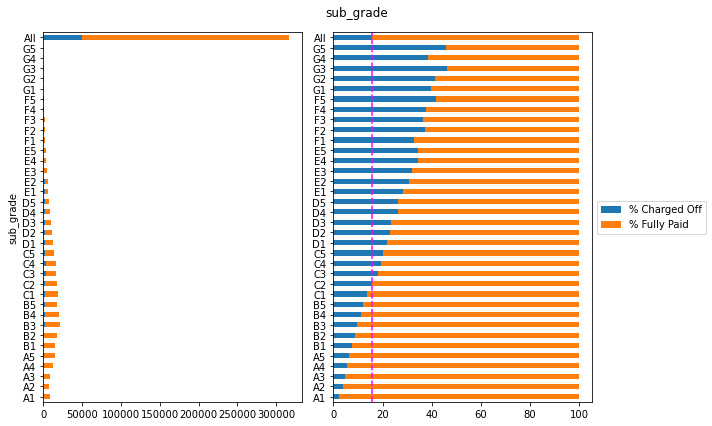

In [191]:
dist_cat_feature(df, 'sub_grade', figsize=(10,6))

## emp_length

In [192]:
categories = ['NONE', '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
            '6 years', '7 years', '8 years','9 years', '10+ years']
ordered = True
df.emp_length = df.emp_length.fillna('NONE').astype(pd.CategoricalDtype(categories=categories, ordered=ordered))

loan_status,Charged Off,Fully Paid,All,% Charged Off,% Fully Paid
emp_length,,,,,
NONE,3256,11076,14332,22.72,77.28
< 1 year,4204,21051,25255,16.65,83.35
1 year,3361,17315,20676,16.26,83.74
2 years,4449,24283,28732,15.48,84.52
3 years,3950,21405,25355,15.58,84.42
4 years,2962,16271,19233,15.40,84.60
5 years,3298,17986,21284,15.50,84.50
6 years,2513,14195,16708,15.04,84.96
7 years,2604,13940,16544,15.74,84.26


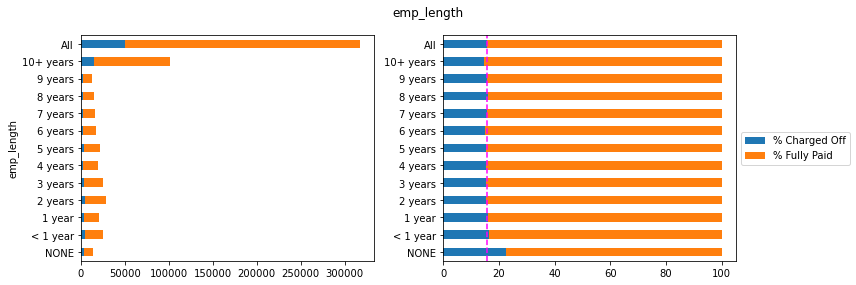

In [195]:
dist_cat_feature(df, 'emp_length', figsize=(12,4))

## home_ownership

According to the data dict, there should be only `MORTGAGE, OWN, RENT, OTHER`

In [196]:
df.home_ownership = df.home_ownership.replace({'ANY':'OTHER','NONE':'OTHER'})
df.home_ownership.value_counts(normalize=True)

MORTGAGE    0.503972
RENT        0.400722
OWN         0.094934
OTHER       0.000372
Name: home_ownership, dtype: float64

loan_status,Charged Off,Fully Paid,All,% Charged Off,% Fully Paid
home_ownership,,,,,
MORTGAGE,21602,138067,159669,13.53,86.47
OTHER,15,103,118,12.71,87.29
OWN,5055,25022,30077,16.81,83.19
RENT,23277,103680,126957,18.33,81.67
All,49949,266872,316821,15.77,84.23


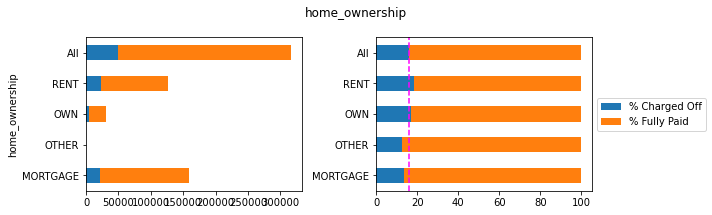

In [197]:
dist_cat_feature(df, 'home_ownership', figsize=(10,3))

## verification_status

loan_status,Charged Off,Fully Paid,All,% Charged Off,% Fully Paid
verification_status,,,,,
Not Verified,11808,89779,101587,11.62,88.38
Source Verified,18174,86410,104584,17.38,82.62
Verified,19967,90683,110650,18.05,81.95
All,49949,266872,316821,15.77,84.23


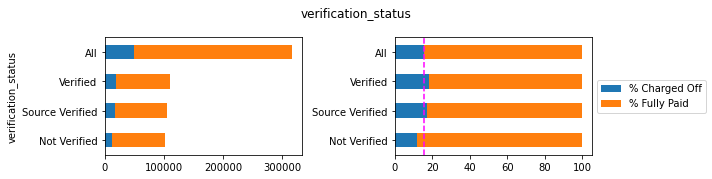

In [199]:
dist_cat_feature(df, 'verification_status', figsize=(10,2.5))

### inc_not_verified

Whether or not income verified

loan_status,Charged Off,Fully Paid,All,% Charged Off,% Fully Paid
inc_not_verified,,,,,
False,38141,177093,215234,17.72,82.28
True,11808,89779,101587,11.62,88.38
All,49949,266872,316821,15.77,84.23


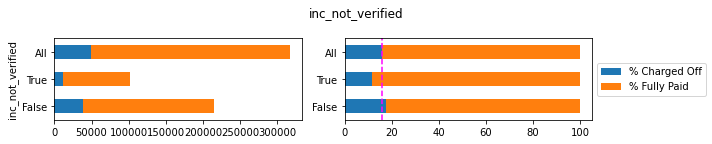

In [200]:
df['inc_not_verified'] = df.verification_status.eq('Not Verified')
dist_cat_feature(df, 'inc_not_verified', figsize=(10,2))

## purpose

loan_status,Charged Off,Fully Paid,All,% Charged Off,% Fully Paid
purpose,,,,,
car,405,3423,3828,10.58,89.42
credit_card,9012,58010,67022,13.45,86.55
debt_consolidation,31170,155842,187012,16.67,83.33
educational,27,185,212,12.74,87.26
home_improvement,2579,16639,19218,13.42,86.58
house,267,1502,1769,15.09,84.91
major_purchase,914,6157,7071,12.93,87.07
medical,584,2770,3354,17.41,82.59
moving,437,1812,2249,19.43,80.57


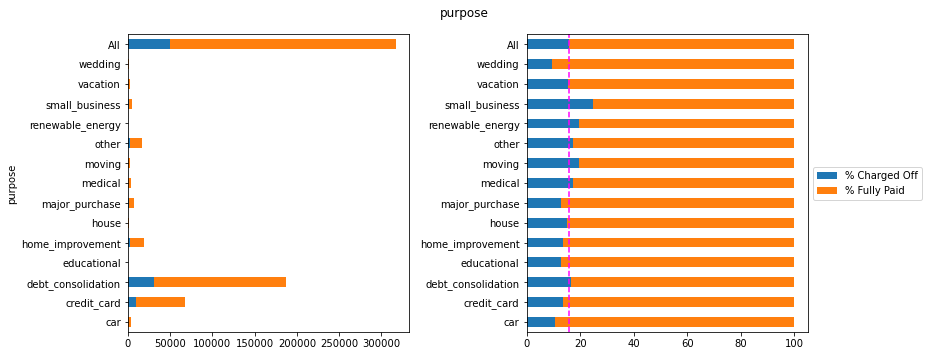

In [203]:
dist_cat_feature(df, 'purpose', figsize=(13,5))

In [204]:
df.purpose.value_counts(dropna=False, normalize=True)

debt_consolidation    0.590277
credit_card           0.211545
home_improvement      0.060659
other                 0.053396
major_purchase        0.022319
small_business        0.014163
car                   0.012083
medical               0.010586
moving                0.007099
vacation              0.006196
house                 0.005584
wedding               0.004615
renewable_energy      0.000811
educational           0.000669
Name: purpose, dtype: float64

## initial_list_status

loan_status,Charged Off,Fully Paid,All,% Charged Off,% Fully Paid
initial_list_status,,,,,
f,29534,161118,190652,15.49,84.51
w,20415,105754,126169,16.18,83.82
All,49949,266872,316821,15.77,84.23


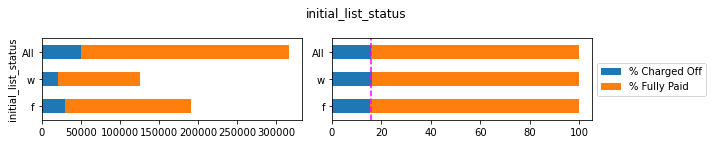

In [205]:
dist_cat_feature(df, 'initial_list_status', figsize=(10,2))

## application_type

loan_status,Charged Off,Fully Paid,All,% Charged Off,% Fully Paid
application_type,,,,,
DIRECT_PAY,61,155,216,28.24,71.76
INDIVIDUAL,49854,266416,316270,15.76,84.24
JOINT,34,301,335,10.15,89.85
All,49949,266872,316821,15.77,84.23


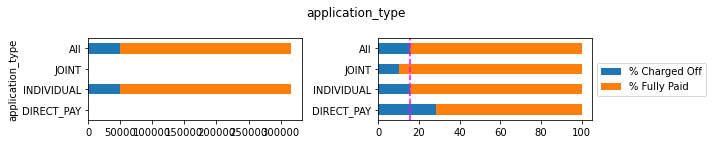

In [206]:
dist_cat_feature(df, 'application_type', figsize=(10,2))

In [207]:
df.application_type.value_counts(normalize=True, dropna=False)

INDIVIDUAL    0.998261
JOINT         0.001057
DIRECT_PAY    0.000682
Name: application_type, dtype: float64

## address

### state

loan_status,Charged Off,Fully Paid,All,% Charged Off,% Fully Paid
state,,,,,
AA,1775,9406,11181,15.88,84.12
AE,1759,9513,11272,15.61,84.39
AK,860,4773,5633,15.27,84.73
AL,857,4666,5523,15.52,84.48
AP,1867,9600,11467,16.28,83.72
AR,869,4664,5533,15.71,84.29
AZ,875,4678,5553,15.76,84.24
CA,849,4678,5527,15.36,84.64
CO,886,4670,5556,15.95,84.05


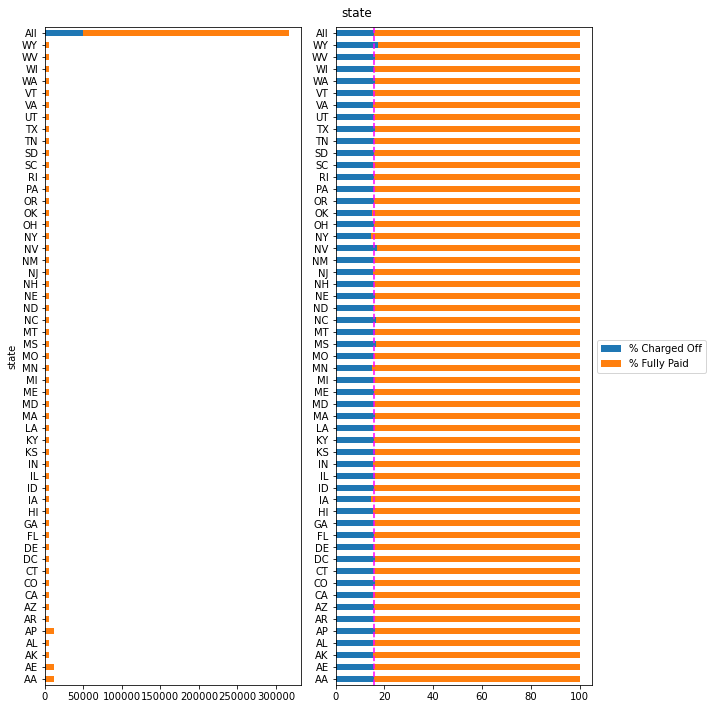

In [211]:
df['state'] = df.address.str.split('[\s,]', regex=True).apply(lambda x: x[-2])
dist_cat_feature(df, 'state', figsize=(10,10))

### zip

loan_status,Charged Off,Fully Paid,All,% Charged Off,% Fully Paid
zip,,,,,
00813,0,38397,38397,0.00,100.00
05113,0,38235,38235,0.00,100.00
11650,7178,0,7178,100.00,0.00
22690,7041,38198,45239,15.56,84.44
29597,0,38046,38046,0.00,100.00
30723,7130,38187,45317,15.73,84.27
48052,7174,37433,44607,16.08,83.92
70466,7204,38376,45580,15.81,84.19
86630,7072,0,7072,100.00,0.00


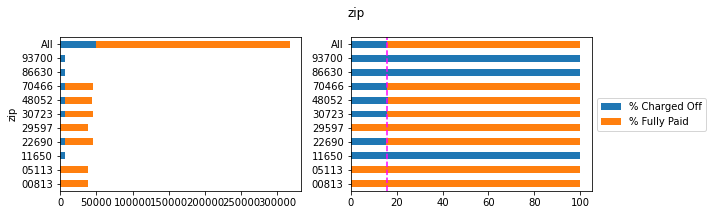

In [212]:
df['zip'] = df.address.str.split('[\s,]', regex=True).apply(lambda x: x[-1])
dist_cat_feature(df, 'zip', figsize=(10,3))

# Date variables

## earliest_cr_line

loan_status,Charged Off,Fully Paid,All,% Charged Off,% Fully Paid
earliest_cr_year,,,,,
1969,34,180,214,15.89,84.11
1970,43,226,269,15.99,84.01
1971,38,209,247,15.38,84.62
1972,63,309,372,16.94,83.06
1973,60,369,429,13.99,86.01
...,...,...,...,...,...
2065,15,64,79,18.99,81.01
2066,21,80,101,20.79,79.21
2067,44,120,164,26.83,73.17


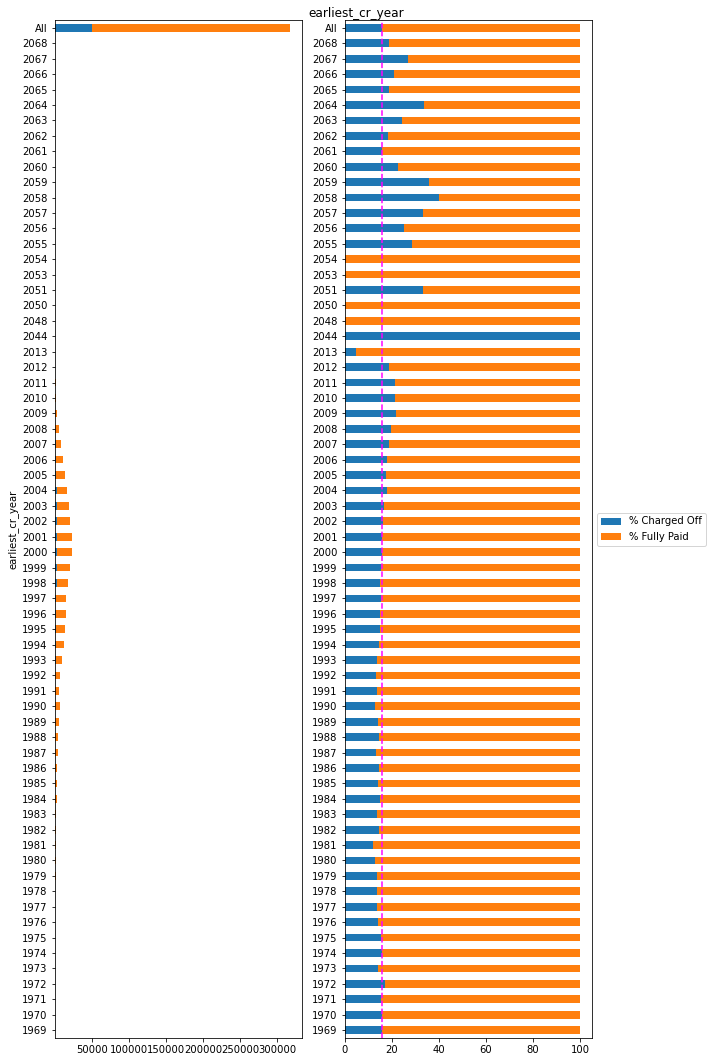

In [217]:
df['earliest_cr_year'] = pd.to_datetime(df.earliest_cr_line).dt.year
dist_cat_feature(df, 'earliest_cr_year', figsize=(10,15))

There are future dates, assuming this is not correct and will impute this with max year

### earliest_cr_year

loan_status,Charged Off,Fully Paid,All,% Charged Off,% Fully Paid
earliest_cr_year_adj,,,,,
1969,34,180,214,15.89,84.11
1970,43,226,269,15.99,84.01
1971,38,209,247,15.38,84.62
1972,63,309,372,16.94,83.06
1973,60,369,429,13.99,86.01
1974,76,409,485,15.67,84.33
1975,86,474,560,15.36,84.64
1976,99,603,702,14.10,85.90
1977,125,797,922,13.56,86.44


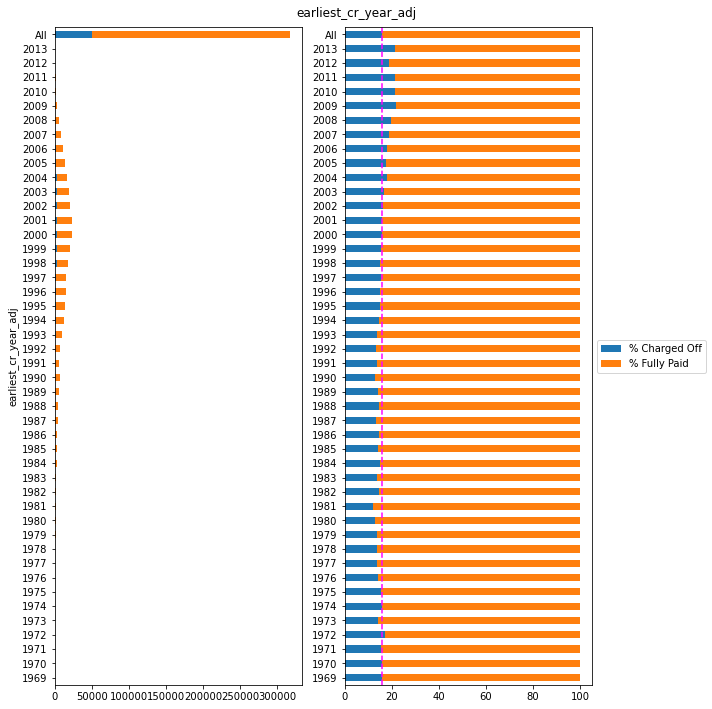

In [223]:
df['earliest_cr_year_adj'] = df.earliest_cr_year.apply(lambda x: x if x < 2013 else 2013).astype(int)
dist_cat_feature(df, 'earliest_cr_year_adj', figsize=(10,10))